# September

## Fatigueverhalten

In [ ]:

using SymPy
using Plots

Fig=plot()
Figzoom=plot()

# Fatigue-Test
####### Parylene ###########
## Setup Konfiguration
# Layer 3 Stahl
Es       = 200000 #Stahl
Sigma_Bs = 250 #MPa

ds=0.5 #mm
w=15 #mm
I=w*ds^3/12
l=70
deltamax=range(0,10,10) #mm


## Geometrie 
d1=0.010 #mm
d2=0.010 #mm
d3=0.5 #mm


## Mechaninische Eigenschaften
wp=10 #mm
# Layer 3 Silicon
#Silicon
E3=160000
vsi=0.253
Sigma_B3=170 #MPa

# Layer 2 Parylene
E2=2800
Sigma_B2=69 #MPa

# Layer 1 Parylene
E1=2800
Sigma_B1=69 #MPa

sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigmas_max=[]
for i in deltamax

    ## Neutral axis berechnung

    ## Krafte und Torque
    F=i*48*Es*I/l^3
    M_max=(F/2)*l/2
    x_p=l/2
    M=(x_p/l)*M_max #N.mm


    c=symbols("c")
    eq=(1/2)*(w*Es*((ds-c)^2-(c)^2)+wp*E1*((ds-c+d1)^2-(ds-c)^2)+wp*E2*((ds-c+d1+d2)^2-(ds-c+d1)^2)+wp*E3*((ds-c+d1+d2+d3)^2-(ds-c+d1+d2)^2))

    sol=solve(eq,c)
    sol
    c=sol[]
    ## Belastung

    m=symbols("m")
    eqb=M-m*(1/3)*(w*Es*((ds-c)^3-(c)^3)+wp*E1*((ds-c+d1)^3-(ds-c)^3)+wp*E2*((ds-c+d1+d2)^3-(ds-c+d1)^3)+wp*E3*((ds-c+d1+d2+d3)^3-(ds-c+d1+d2)^3)+w*Es*((c)^3))
    solb=solve(eqb,m)
    solb
    m=solb[]

    ymax=(ds-c)+d1+d2+d3
    emax=ymax*m
    sigma3=m*(ds-c+d1+d2+d3)*E3
    sigma2=m*(ds-c+d1+d2)*E2
    sigma1=m*(ds-c+d1)*E1
    sigmas=m*(c)*Es


    push!(sigma3_max,sigma3)
    push!(sigma2_max,sigma2)
    push!(sigma1_max,sigma1)
    push!(sigmas_max,sigmas)

end

plot!(Fig,deltamax, sigma3_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square);
plot!(Fig,deltamax, sigma2_max, label="Parylene 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Fig,deltamax, sigma1_max, label="Parylene 1", lw=2, linestyle=:dash, color=:orange, marker=:diamond);
plot!(Fig,deltamax, sigmas_max, label="Stahl", xlabel="Verschiebungsamplitude(mm)", ylabel="Vorspannung (MPa)", lw=2, linestyle=:dash, color=:gray, marker=:circle);

plot!(Figzoom,deltamax, sigma2_max, label="Parylene 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Figzoom,deltamax, sigma1_max, label="Parylene 1", xlabel="Verschiebungsamplitude(mm)", ylabel="Vorspannung (MPa)", lw=2, linestyle=:dash, color=:orange, marker=:diamond);


####### Polyimide ###########

Fig2=plot()
Figzoom2=plot()


## Setup Konfiguration
# Layer 3 Stahl
Es       = 200000 #Stahl
Sigma_Bs = 250 #MPa

ds=0.5 #mm
w=15 #mm
I=w*ds^3/12
l=70
deltamax=range(0,10,10) #mm


## Geometrie 
d1=0.010 #mm
d2=0.010 #mm
d3=0.5 #mm


## Mechaninische Eigenschaften
wp=10 #mm
# Layer 3 Silicon
E3=160000
Sigma_B3=170 #MPa

# Layer 2 Polyimid
E2=3200
Sigma_B2=69 #MPa

# Layer 1 Polyimid
E1=3200
Sigma_B1=69 #MPa

sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigmas_max=[]
for i in deltamax

    ## Neutral axis berechnung

    ## Krafte und Torque
    F=i*48*Es*I/l^3
    M_max=(F/2)*l/2
    x_p=l/2
    M=(x_p/l)*M_max #N.mm


    c=symbols("c")
    eq=(1/2)*(w*Es*((ds-c)^2-(c)^2)+wp*E1*((ds-c+d1)^2-(ds-c)^2)+wp*E2*((ds-c+d1+d2)^2-(ds-c+d1)^2)+wp*E3*((ds-c+d1+d2+d3)^2-(ds-c+d1+d2)^2))

    sol=solve(eq,c)
    sol
    c=sol[]
    ## Belastung

    m=symbols("m")
    eqb=M-m*(1/3)*(w*Es*((ds-c)^3-(c)^3)+wp*E1*((ds-c+d1)^3-(ds-c)^3)+wp*E2*((ds-c+d1+d2)^3-(ds-c+d1)^3)+wp*E3*((ds-c+d1+d2+d3)^3-(ds-c+d1+d2)^3)+w*Es*((c)^3))
    solb=solve(eqb,m)
    solb
    m=solb[]

    ymax=(ds-c)+d1+d2+d3
    emax=ymax*m
    sigma3=m*(ds-c+d1+d2+d3)*E3
    sigma2=m*(ds-c+d1+d2)*E2
    sigma1=m*(ds-c+d1)*E1
    sigmas=m*(c)*Es


    push!(sigma3_max,sigma3)
    push!(sigma2_max,sigma2)
    push!(sigma1_max,sigma1)
    push!(sigmas_max,sigmas)

end

plot!(Fig2,deltamax, sigma3_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square);
plot!(Fig2,deltamax, sigma2_max, label="Polymide 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Fig2,deltamax, sigma1_max, label="Polyimide 1", lw=2, linestyle=:dash, color=:orange, marker=:diamond);
plot!(Fig2,deltamax, sigmas_max, label="Stahl", xlabel="Verschiebungsamplitude(mm)", ylabel="Vorspannung (MPa)", lw=2, linestyle=:dash, color=:gray, marker=:circle);

plot!(Figzoom2,deltamax, sigma2_max, label="Polyimide 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Figzoom2,deltamax, sigma1_max, label="Polyimide 1", xlabel="Verschiebungsamplitude(mm)", ylabel="Vorspannung (MPa)", lw=2, linestyle=:dash, color=:orange, marker=:diamond);




# Themal test

In [ ]:
display(Fig)
display(Fig2)

In [ ]:
display(Figzoom)
display(Figzoom2)

## Thermal-Verhalten

### Parylene-Al

In [ ]:
using SymPy
using Plots
using DataFrames
####### Thermalverhalten ##########

FigThermal=plot()


## Materials

#Parylene
Ep=2800
vp=0.4
alphap=35*10^(-6)
#Silicon
Esi=160000
vsi=0.253
alphasi=2.9*10^(-6)
#Aluminum
Eal=70000
val=0.33
alphaal=23.5*10^(-6)

## Equations

## Dehnung 
e1_1,e2_1,e3_1=symbols("e1_1 e2_1 e3_1")
e1_2,e2_2,e3_2=symbols("e1_2 e2_2 e3_2")
e1_3,e2_3,e3_3=symbols("e1_3 e2_3 e3_3")

## Spannung
o1_1,o2_1,o3_1=symbols("o1_1 o2_1 o3_1")
o1_2,o2_2,o3_2=symbols("o1_2 o2_2 o3_2")
o1_3,o2_3,o3_3=symbols("o1_3 o2_3 o3_3")


## Layers

v1,v2,v3=vsi,vp,val
E1,E2,E3=Esi,Ep,Eal
alpha1,alpha2,alpha3=alphasi,alphap,alphaal

## Geometrie

t1,t2,t3=0.5,0.01,0.04
l1,l2,l3=10,10,10
w1,w2,w3=5,5,5

## Load

deltaTRange=range(0,100,step=10) 


sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigma_2=[]
for deltaT in deltaTRange
    #Constitutive law

    ## Richtung X
    eq1=e1_1-(1/E1)*(o1_1-v1*(o2_1-o3_1))-alpha1*deltaT
    eq2=e1_2-(1/E2)*(o1_2-v2*(o2_2-o3_2))-alpha2*deltaT
    eq3=e1_3-(1/E3)*(o1_3-v3*(o2_3-o3_3))-alpha3*deltaT

    ## Richtung Y
    eq4=e2_1-(1/E1)*(o2_1-v1*(o1_1-o3_1))-alpha1*deltaT
    eq5=e2_2-(1/E2)*(o2_2-v2*(o1_2-o3_2))-alpha2*deltaT
    eq6=e2_3-(1/E3)*(o2_3-v3*(o1_3-o3_3))-alpha3*deltaT


    ## Richtung Z
    eq7=e3_1-(1/E1)*(o3_1-v1*(o1_1-o2_1))-alpha1*deltaT
    eq8=e3_2-(1/E2)*(o3_2-v2*(o1_2-o2_2))-alpha2*deltaT
    eq9=e3_3-(1/E3)*(o3_3-v3*(o1_3-o2_3))-alpha3*deltaT


    #Kompatibilität

    ## Richtung X
    eq10=e1_1
    eq11=e1_2
    eq12=e1_3

    ## Richtung Y

    eq13=e2_1*t1+e2_2*t2+e2_3*t3
    eq14=o2_1-o2_2
    eq15=o2_2-o2_3

    ## Richtung Z

    eq16=e3_1
    eq17=e3_2
    eq18=e3_3

    ## solve
    sol=solve([eq1,eq2,eq3,
                eq4,eq5,eq6,
                eq7,eq8,eq9,
                eq10,eq11,eq12,
                eq13,eq14,eq15,
                eq16,eq17,eq18],
                [e1_1,e2_1,e3_1,
                e1_2, e2_2, e3_2,
                e1_3, e2_3, e3_3,
                o1_1, o2_1, o3_1,
                o1_2,o2_2,o3_2,
                o1_3,o2_3,o3_3])
    sol

    sigma1=minimum([sol[o1_1],sol[o2_1],sol[o3_1]]) # Layer 1
    sigma2=minimum([sol[o1_2],sol[o2_2],sol[o3_2]]) # Layer 2
    sigma3=minimum([sol[o1_3],sol[o2_3],sol[o3_3]]) # Layer 3

    push!(sigma1_max,abs(sigma1))
    push!(sigma2_max,abs(sigma2))
    push!(sigma3_max,abs(sigma3))
    push!(sigma_2,abs(sol[o2_1]))
end

sigma1_max

df_PaAl=DataFrame(o2=sigma_2,o_subs=sigma1_max,o_coat=sigma2_max,o_metal=sigma3_max)

plot!(FigThermal,deltaTRange, ylims=(0, 250), sigma1_max,  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  label="Si",         lw=2, linestyle=:dash, color=:black,  marker=:square )
plot!(FigThermal,deltaTRange, ylims=(0, 250), sigma2_max,  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  label="Parylene",   lw=2, linestyle=:dash, color=:yellow, marker=:circle )
plot!(FigThermal,deltaTRange, ylims=(0, 250), sigma3_max,  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  label="Aluminum",   lw=2, linestyle=:dash, color=:orange, marker=:diamond)
plot!(FigThermal,deltaTRange, ylims=(0, 250), sigma_2,  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",     label="Y-Richtung", lw=2, linestyle=:dash, color=:blue,   marker=:hexagon)


In [ ]:
df_PaAl

### Polyimide-Copper

In [ ]:

####### Thermalverhalten ##########

FigThermal2=plot()


## Materials

#Polyimide
Ep=3200
vp=0.34
alphap=55*10^(-6)
#Silicon
Esi=160000
vsi=0.253
alphasi=2.9*10^(-6)
#Copper
Eco=117000
vco=0.3
alphaco=16.5*10^(-6)

## Equations

## Dehnung 
e1_1,e2_1,e3_1=symbols("e1_1 e2_1 e3_1")
e1_2,e2_2,e3_2=symbols("e1_2 e2_2 e3_2")
e1_3,e2_3,e3_3=symbols("e1_3 e2_3 e3_3")

## Spannung
o1_1,o2_1,o3_1=symbols("o1_1 o2_1 o3_1")
o1_2,o2_2,o3_2=symbols("o1_2 o2_2 o3_2")
o1_3,o2_3,o3_3=symbols("o1_3 o2_3 o3_3")


## Layers

v1,v2,v3=vsi,vp,vco
E1,E2,E3=Esi,Ep,Eco
alpha1,alpha2,alpha3=alphasi,alphap,alphaco

## Geometrie

t1,t2,t3=0.5,0.01,0.04*0.58
l1,l2,l3=10,10,10
w1,w2,w3=5,5,5

## Load

deltaTRange=range(0,100,step=10) 


sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigma_2=[]
for deltaT in deltaTRange
    #Constitutive law

    ## Richtung X
    eq1=e1_1-(1/E1)*(o1_1-v1*(o2_1-o3_1))-alpha1*deltaT
    eq2=e1_2-(1/E2)*(o1_2-v2*(o2_2-o3_2))-alpha2*deltaT
    eq3=e1_3-(1/E3)*(o1_3-v3*(o2_3-o3_3))-alpha3*deltaT

    ## Richtung Y
    eq4=e2_1-(1/E1)*(o2_1-v1*(o1_1-o3_1))-alpha1*deltaT
    eq5=e2_2-(1/E2)*(o2_2-v2*(o1_2-o3_2))-alpha2*deltaT
    eq6=e2_3-(1/E3)*(o2_3-v3*(o1_3-o3_3))-alpha3*deltaT


    ## Richtung Z
    eq7=e3_1-(1/E1)*(o3_1-v1*(o1_1-o2_1))-alpha1*deltaT
    eq8=e3_2-(1/E2)*(o3_2-v2*(o1_2-o2_2))-alpha2*deltaT
    eq9=e3_3-(1/E3)*(o3_3-v3*(o1_3-o2_3))-alpha3*deltaT


    #Kompatibilität

    ## Richtung X
    eq10=e1_1
    eq11=e1_2
    eq12=e1_3

    ## Richtung Y

    eq13=e2_1*t1+e2_2*t2+e2_3*t3
    eq14=o2_1-o2_2
    eq15=o2_2-o2_3

    ## Richtung Z

    eq16=e3_1
    eq17=e3_2
    eq18=e3_3

    ## solve
    sol=solve([eq1,eq2,eq3,
                eq4,eq5,eq6,
                eq7,eq8,eq9,
                eq10,eq11,eq12,
                eq13,eq14,eq15,
                eq16,eq17,eq18],
                [e1_1,e2_1,e3_1,
                e1_2, e2_2, e3_2,
                e1_3, e2_3, e3_3,
                o1_1, o2_1, o3_1,
                o1_2,o2_2,o3_2,
                o1_3,o2_3,o3_3])
    sol

    sigma1=minimum([sol[o1_1],sol[o2_1],sol[o3_1]]) # Layer 1
    sigma2=minimum([sol[o1_2],sol[o2_2],sol[o3_2]]) # Layer 2
    sigma3=minimum([sol[o1_3],sol[o2_3],sol[o3_3]]) # Layer 3

    push!(sigma1_max,abs(sigma1))
    push!(sigma2_max,abs(sigma2))
    push!(sigma3_max,abs(sigma3))
    push!(sigma_2,abs(sol[o2_1]))
end

sigma1_max

df_PICo=DataFrame(o2=sigma_2,o_subs=sigma1_max,o_coat=sigma2_max,o_metal=sigma3_max)

plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma1_max, label="Si",  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma2_max, label="Polyimide",  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  lw=2, linestyle=:dash, color=:yellow, marker=:circle)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma3_max, label="Copper",  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  lw=2, linestyle=:dash, color=:orange, marker=:diamond)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma_2, label="Y-Richtung",  xlabel = "Temperature (°C)", ylabel = "Vospannung (MPa)",  lw=2, linestyle=:dash, color=:blue, marker=:hexagon)


In [ ]:
display(FigThermal)
display(FigThermal2)

In [ ]:
display(df_PaAl[10,:])
display(df_PICo[10,:])

In [ ]:
# Extract the column names and values
column_names = names(df_PaAl[10,:])

PA = vec([df_PaAl[10, i] for i in 1:ncol(df_PaAl)])

PI = vec([df_PICo[10, i] for i in 1:ncol(df_PICo)])

# Create the bar plot
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung at 100 °C", xlabel = "Layer", ylabel = "Vorspannung (MPa)", legend=true,bar_position = :dodge )
bar!(column_names, PA, label = "Parylene-Aluminum", title = "Vorspannung at 100 °C", xlabel = "Layer", ylabel = "Vorspannung (MPa)", legend=true)




In [ ]:
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true,bar_position = :dodge )

## 28.09 - 29.09 Cylinder Modell

In [ ]:
###### Cylindrical via ############
using DataFrames
using SymPy
using Plots

## Materials

#Parylene
Ep=2800
vp=0.4
alphap=35*10^(-6)

#Aluminum
Eal=70000
val=0.33
alphaal=23.6*10^(-6)


## Equations

## Verformung 
u_m,u_s, u_s2 =symbols("u_m u_s u_s2")

## Spannung
p=symbols("p")

## Layers

v_m,v_s          = val, vp
E_m,E_s          = Eal, Ep
alpha_m, alpha_s = alphaal,alphap

## Geometrie

r_m , r_s  = 0.030 , 0.035
l = 10

## Load

deltaTRange=range(0, 200, step=10) 
sigma=[]
dr=[]
dvm=[]
dvs=[]

vm0  = (pi*l)*(r_m^2)
vs0  = (pi*l)*(r_s^2-r_m^2)

for deltaT in deltaTRange

    ## Kompatibilität

    eq1 = u_s - ((1-v_s)/E_s)*((-p*r_m^2)/(r_s^2-r_m^2))*r_m+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_m)*(p/(r_s^2-r_m^2)) - r_m*alpha_s*deltaT
    eq2 = u_m - ((1-v_m)/E_m)*((+p*r_m^2)/(r_m^2))*r_m - r_m*alpha_m*deltaT
    eq3 = u_s  - u_m
    eq4 = u_s2 - ((1-v_s)/E_s)*(-p*r_m^2)/(r_s^2-r_m^2)*r_s+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_s)*(p/(r_s^2-r_m^2)) - r_s*alpha_s*deltaT

    ## solve
    sol=solve([eq1,eq2,eq3,eq4],
              [u_s,u_s2,u_m,p])
    sol
    dvm_i = (pi*l)*((r_m+sol[u_m])^2-r_m^2)
    dvs_i = (pi*l)*(((r_s+sol[u_s2])^2-(r_m+sol[u_s])^2)-(r_s^2-r_m^2))

    push!(sigma, sol[p])
    push!(dr,  sol[u_m])
    push!(dvm, dvm_i)
    push!(dvs, dvs_i)

end

df_PAAl=DataFrame(pressure=sigma)
FigThermal1=plot()
FigThermal2=plot()
FigThermal3=plot()

plot!(FigThermal1, deltaTRange, dr*1000,    label="u (um)" , lw=2, linestyle=:dash, color=:blue, marker=:square)
plot!(FigThermal2, deltaTRange, sigma, ylims=(0, 4), label="Palyrene-Aluminum"       ,  xlabel="Temperature (C)", ylabel="Vorspannung(MPa)", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal3, deltaTRange, (dvm/vm0)*100,  ylims=(0, 3),   label="Aluminum"     ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:red, marker=:circle)
plot!(FigThermal3, deltaTRange, (dvs/vs0)*100,   ylims=(0, 3),   label="Palyrene"     ,  xlabel="Temperature (C)", ylabel="Volume increase(%)",lw=2, linestyle=:dash, color=:blue, marker=:square)




In [ ]:

df_PAAl=DataFrame(pressure=sigma)

In [ ]:
display(FigThermal1)
display(FigThermal2)
display(FigThermal3)

In [ ]:
###### Cylindrical via ############


## Materials

#Polyimide
Ep=3200
vp=0.34
alphap=55*10^(-6)

#Copper
Eco=117000
vco=0.3
alphaco=16.5*10^(-6)


## Equations

## Verformung 
u_m,u_s, u_s2 =symbols("u_m u_s u_s2")

## Spannung
p=symbols("p")

## Layers

v_m,v_s          = vco, vp
E_m,E_s          = Eco, Ep
alpha_m, alpha_s = alphaco,alphap

## Geometrie

r_m , r_s  = 0.030 , 0.035
l = 10

## Load

deltaTRange=range(0, 200, step=10) 
sigma=[]
dr=[]
dvm=[]
dvs=[]

vm0  = (pi*l)*(r_m^2)
vs0  = (pi*l)*(r_s^2-r_m^2)

for deltaT in deltaTRange

    ## Kompatibilität

    eq1 = u_s - ((1-v_s)/E_s)*((-p*r_m^2)/(r_s^2-r_m^2))*r_m+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_m)*(p/(r_s^2-r_m^2)) - r_m*alpha_s*deltaT
    eq2 = u_m - ((1-v_m)/E_m)*((+p*r_m^2)/(r_m^2))*r_m - r_m*alpha_m*deltaT
    eq3 = u_s  - u_m
    eq4 = u_s2 - ((1-v_s)/E_s)*(-p*r_m^2)/(r_s^2-r_m^2)*r_s+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_s)*(p/(r_s^2-r_m^2)) - r_s*alpha_s*deltaT

    ## solve
    sol=solve([eq1,eq2,eq3,eq4],
              [u_s,u_s2,u_m,p])
    sol
    dvm_i = (pi*l)*((r_m+sol[u_m])^2-r_m^2)
    dvs_i = (pi*l)*(((r_s+sol[u_s2])^2-(r_m+sol[u_s])^2)-(r_s^2-r_m^2))

    push!(sigma, sol[p])
    push!(dr,  sol[u_m])
    push!(dvm, dvm_i)
    push!(dvs, dvs_i)

end

FigThermal11=plot()
FigThermal22=plot()
FigThermal33=plot()

plot!(FigThermal11, deltaTRange, dr*1000      ,    label="u (um)" , lw=2, linestyle=:dash, color=:blue, marker=:square)
plot!(FigThermal22, deltaTRange, sigma    , ylims=(0, 4)     , label="Polymide-Copper"     ,  xlabel="Temperature (C)", ylabel="Vorspannung(MPa)", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal33, deltaTRange, (dvm/vm0)*100,  ylims=(0, 3),    label="Copper"   ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:red, marker=:circle)
plot!(FigThermal33, deltaTRange, (dvs/vs0)*100,   ylims=(0, 3),   label="Polymide" ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:blue, marker=:square)




In [ ]:
display(FigThermal11)
display(FigThermal22)
display(FigThermal33)

In [ ]:
display(FigThermal1)
display(FigThermal11)


In [ ]:
display(FigThermal2)
display(FigThermal22)


In [ ]:
display(FigThermal3)
display(FigThermal33)


In [ ]:
# Extract the column names and values
column_names = names(df_PaAl[10,:])

PA = vec([df_PaAl[10, i] for i in 1:ncol(df_PaAl)])

PI = vec([df_PICo[10, i] for i in 1:ncol(df_PICo)])

# Create the bar plot
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true,bar_position = :dodge )
bar!(column_names, PA, label = "Parylene-Aluminum", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true)



# Oktober


## 04.10 Cylinder Modell

In [1]:

using Rini

In [56]:
E_m=Rini.E_Aluminium(250)

70.0

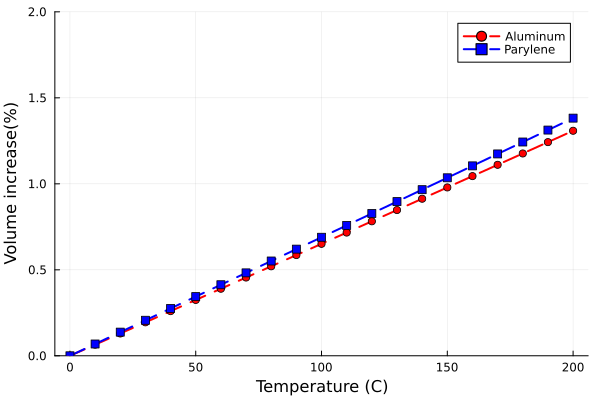

In [65]:
###### Cylindrical via ############
using DataFrames
using SymPy
using Plots

## Materials

#Parylene
Ep=2800
vp=0.4
alphap=35*10^(-6)

#Aluminum
Eal=70000
val=0.33
alphaal=23.6*10^(-6)


## Equations

## Verformung 
u_m,u_s, u_s2 =symbols("u_m u_s u_s2")

## Spannung
p=symbols("p")

## Layers

v_m,v_s          = val, vp
E_m,E_s          = Eal, Ep
alpha_m, alpha_s = alphaal,alphap

## Geometrie

r_m , r_s  = 0.030 , 0.035
l = 10

## Load

deltaTRange=range(0, 200, step=10) 
sigma=[]
dr=[]
dvm=[]
dvs=[]

vm0  = (pi*l)*(r_m^2)
vs0  = (pi*l)*(r_s^2-r_m^2)

for deltaT in deltaTRange

    ## Kompatibilität
    E_m=Rini.E_Aluminium(deltaT)
    eq1 = u_s - ((1-v_s)/E_s)*((-p*r_m^2)/(r_s^2-r_m^2))*r_m+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_m)*(p/(r_s^2-r_m^2)) - r_m*alpha_s*deltaT
    eq2 = u_m - ((1-v_m)/E_m)*((+p*r_m^2)/(r_m^2))*r_m - r_m*alpha_m*deltaT
    eq3 = u_s  - u_m
    eq4 = u_s2 - ((1-v_s)/E_s)*(-p*r_m^2)/(r_s^2-r_m^2)*r_s+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_s)*(p/(r_s^2-r_m^2)) - r_s*alpha_s*deltaT

    ## solve
    sol=solve([eq1,eq2,eq3,eq4],
              [u_s,u_s2,u_m,p])
    sol
    dvm_i = (pi*l)*((r_m+sol[u_m])^2-r_m^2)
    dvs_i = (pi*l)*(((r_s+sol[u_s2])^2-(r_m+sol[u_s])^2)-(r_s^2-r_m^2))

    push!(sigma, sol[p])
    push!(dr,  sol[u_m])
    push!(dvm, dvm_i)
    push!(dvs, dvs_i)

end

df_PAAl=DataFrame(pressure=sigma)
FigThermal1=plot()
FigThermal2=plot()
FigThermal3=plot()

plot!(FigThermal1, deltaTRange, dr*1000,    label="u (um)" , lw=2, linestyle=:dash, color=:blue, marker=:square)
plot!(FigThermal2, deltaTRange, sigma, ylims=(0, 1), label="Parylene-Aluminum"       ,  xlabel="Temperature (C)", ylabel="Vorspannung(MPa)", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal3, deltaTRange, (dvm/vm0)*100,  ylims=(0, 2),   label="Aluminum"     ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:red, marker=:circle)
plot!(FigThermal3, deltaTRange, (dvs/vs0)*100,   ylims=(0, 2),   label="Parylene"     ,  xlabel="Temperature (C)", ylabel="Volume increase(%)",lw=2, linestyle=:dash, color=:blue, marker=:square)




In [66]:

df_PAAl=DataFrame(pressure=sigma)

Row,pressure
,Any
1,0.0
2,0.0104634122235485
3,0.0208454895115540
4,0.0311459523440615
5,0.0413645199188295
6,0.0515009101439682
7,0.0615548396305283
8,0.0715260236850365
9,0.0814141763019809


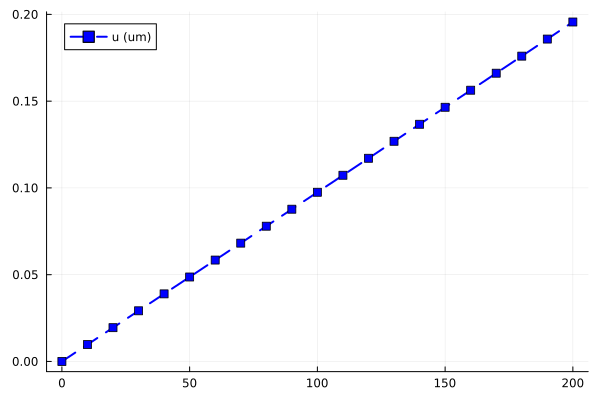

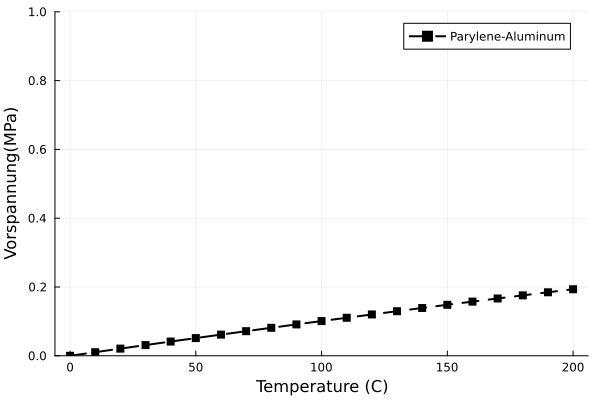

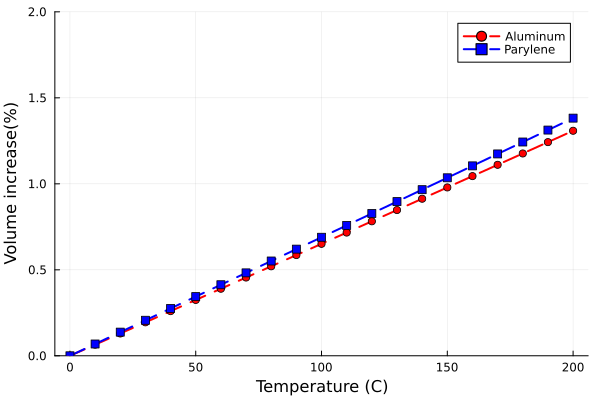

In [67]:
display(FigThermal1)
display(FigThermal2)
display(FigThermal3)

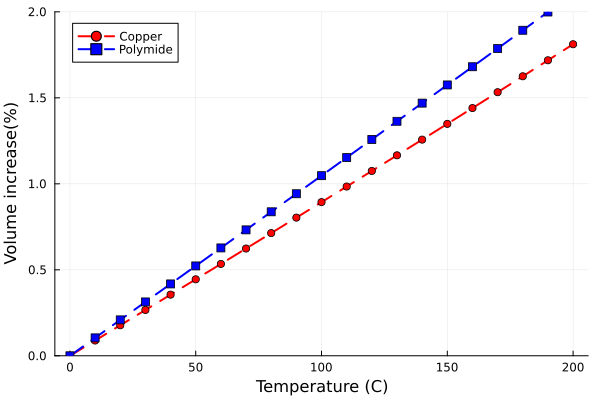

In [68]:
###### Cylindrical via ############


## Materials

#Polyimide
Ep=3200
vp=0.34
alphap=55*10^(-6)

#Copper
Eco=117000
vco=0.3
alphaco=16.5*10^(-6)


## Equations

## Verformung 
u_m,u_s, u_s2 =symbols("u_m u_s u_s2")

## Spannung
p=symbols("p")

## Layers

v_m,v_s          = vco, vp
E_m,E_s          = Eco, Ep
alpha_m, alpha_s = alphaco,alphap

## Geometrie

r_m , r_s  = 0.030 , 0.035
l = 10

## Load

deltaTRange=range(0, 200, step=10) 
sigma=[]
dr=[]
dvm=[]
dvs=[]

vm0  = (pi*l)*(r_m^2)
vs0  = (pi*l)*(r_s^2-r_m^2)

for deltaT in deltaTRange

    ## Kompatibilität
    E_m=Rini.E_Copper(deltaT)
    eq1 = u_s - ((1-v_s)/E_s)*((-p*r_m^2)/(r_s^2-r_m^2))*r_m+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_m)*(p/(r_s^2-r_m^2)) - r_m*alpha_s*deltaT
    eq2 = u_m - ((1-v_m)/E_m)*((+p*r_m^2)/(r_m^2))*r_m - r_m*alpha_m*deltaT
    eq3 = u_s  - u_m
    eq4 = u_s2 - ((1-v_s)/E_s)*(-p*r_m^2)/(r_s^2-r_m^2)*r_s+(((1+v_s)/E_s)*(r_m^2*r_s^2)/r_s)*(p/(r_s^2-r_m^2)) - r_s*alpha_s*deltaT

    ## solve
    sol=solve([eq1,eq2,eq3,eq4],
              [u_s,u_s2,u_m,p])
    sol
    dvm_i = (pi*l)*((r_m+sol[u_m])^2-r_m^2)
    dvs_i = (pi*l)*(((r_s+sol[u_s2])^2-(r_m+sol[u_s])^2)-(r_s^2-r_m^2))

    push!(sigma, sol[p])
    push!(dr,  sol[u_m])
    push!(dvm, dvm_i)
    push!(dvs, dvs_i)

end

FigThermal11=plot()
FigThermal22=plot()
FigThermal33=plot()

plot!(FigThermal11, deltaTRange, dr*1000      ,    label="u (um)" , lw=2, linestyle=:dash, color=:blue, marker=:square)
plot!(FigThermal22, deltaTRange, sigma    , ylims=(0,1)     , label="Polymide-Copper"     ,  xlabel="Temperature (C)", ylabel="Vorspannung(MPa)", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal33, deltaTRange, (dvm/vm0)*100,  ylims=(0, 2),    label="Copper"   ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:red, marker=:circle)
plot!(FigThermal33, deltaTRange, (dvs/vs0)*100,   ylims=(0, 2),   label="Polymide" ,  xlabel="Temperature (C)", ylabel="Volume increase(%)", lw=2, linestyle=:dash, color=:blue, marker=:square)




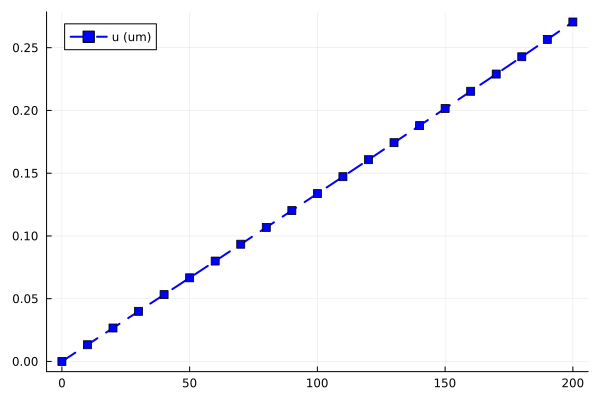

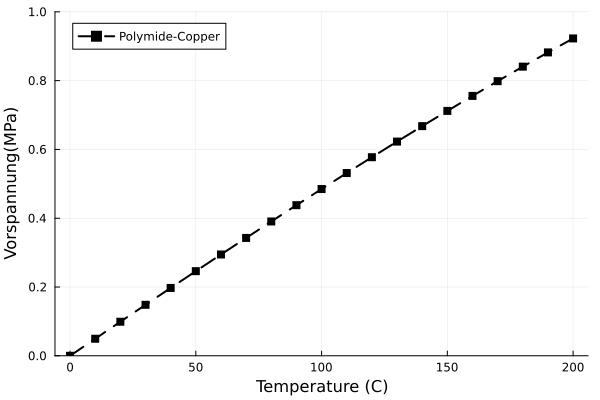

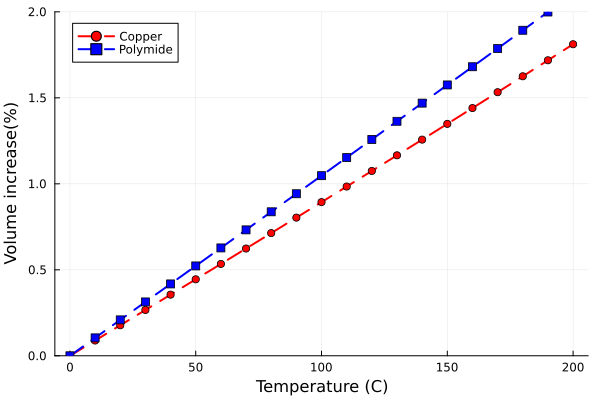

In [69]:
display(FigThermal11)
display(FigThermal22)
display(FigThermal33)

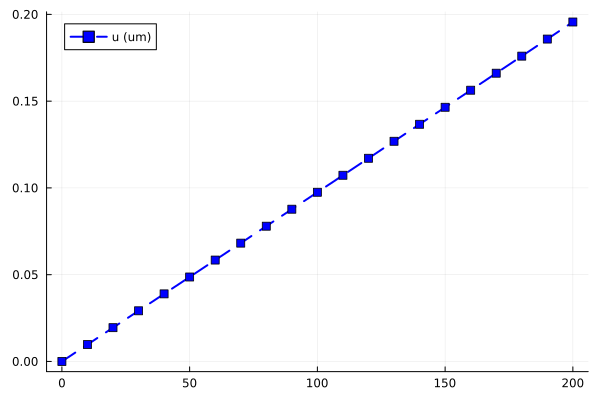

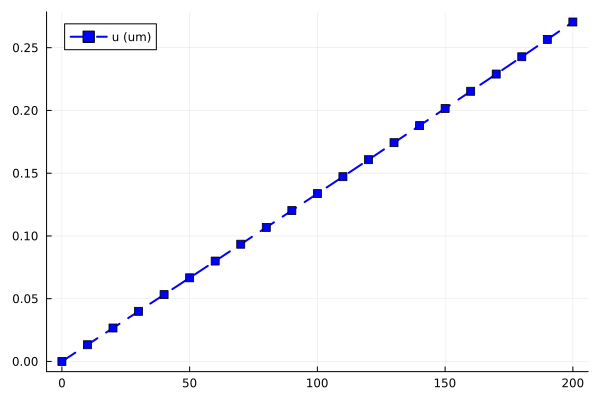

In [70]:
display(FigThermal1)
display(FigThermal11)


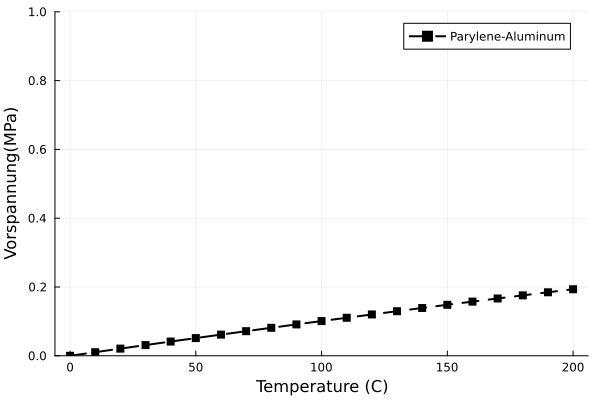

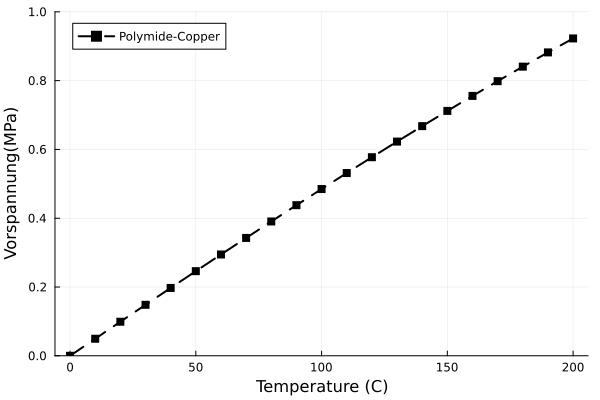

In [71]:
display(FigThermal2)
display(FigThermal22)


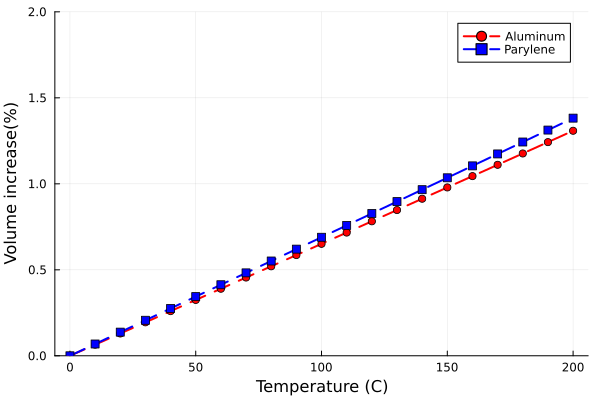

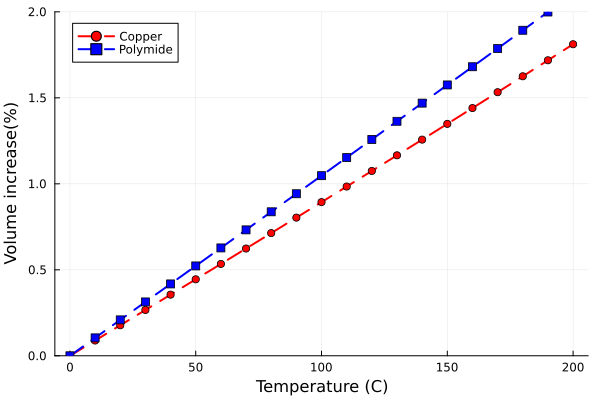

In [72]:
display(FigThermal3)
display(FigThermal33)


In [19]:
# Extract the column names and values
column_names = names(df_PaAl[10,:])

PA = vec([df_PaAl[10, i] for i in 1:ncol(df_PaAl)])

PI = vec([df_PICo[10, i] for i in 1:ncol(df_PICo)])

# Create the bar plot
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true,bar_position = :dodge )
bar!(column_names, PA, label = "Parylene-Aluminum", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true)



UndefVarError: UndefVarError: `df_PaAl` not defined

### 07.10.2024 Aluminium properties fuer Simulation


In [1]:
using Rini

In [7]:
deltaTrange=range(25, 200, step=20)

E=[]
for deltaT in deltaTrange
    
    push!(E,Rini.E_Aluminium(deltaT))
end


In [14]:

display(E)

9-element Vector{Any}:
 79.0
 78.2
 77.4
 76.6
 75.8
 75.0
 74.2
 73.4
 72.6

In [21]:
deltaTrange[9]

185

## Februar 2025

## 17-22.02.2025 Anaylitical model for layered beam under bending condition

In [ ]:
using LinearAlgebra
using QuadGK
using Plots

# Beam parameters
L = 0.002          # Length (m)
b = 0.002          # Width (m)
h1 = 0.675e-3       # Thickness, layer 1 (m)
h2 = 0.01e-3        # Thickness, layer 2 (m)
h3 = 0.2e-3        # Thickness, layer 3 (m)
E1 = 160e9     # Young's modulus, layer 1 (Pa)
E2 = 2.8e9     # Young's modulus, layer 2 (Pa)
E3 = 2e9      # Young's modulus, layer 3 (Pa)

# Moment of inertia
I1 = b * h1^3 / 12
I2 = b * h2^3 / 12
I3 = b * h3^3 / 12

# Flexural rigidity
EI1 = E1 * I1
EI2 = E2 * I2
EI3 = E3 * I3

# Interlayer shear stiffness
E_avg12 = (E1 + E2) / 2
E_avg23 = (E2 + E3) / 2
h_avg12 = (h1 + h2) / 2
h_avg23 = (h2 + h3) / 2
k12 = (E_avg12 * h_avg12) / (h1 + h2)
k23 = (E_avg23 * h_avg23) / (h2 + h3)

# Basis functions: Cantilever (w(0) = w'(0) = 0)
function phi(j, x, L)
    return x^(j + 1)  # j starts at 1, satisfies fixed end
end

function phi_double_prime(j, x, L)
    n = j + 1
    if n < 2
        return 0.0
    elseif n == 2
        return 2.0
    else
        return n * (n - 1) * x^(n - 2)
    end
end

function phi_fourth_prime(j, x, L)
    n = j + 1
    if n < 4
        return 0.0
    else
        return n * (n - 1) * (n - 2) * (n - 3) * x^(n - 4)
    end
end

# Number of terms
n_terms = 4  # Increased for better free-end approximation

# Stiffness matrix
function stiffness_matrix(n_terms, L, EI)
    K = zeros(n_terms, n_terms)
    for i = 1:n_terms
        for j = 1:n_terms
            integrand(x) = EI * phi_double_prime(i, x, L) * phi_double_prime(j, x, L)
            K[i,j], _ = quadgk(integrand, 0, L, rtol=1e-6)
        end
    end
    return K
end

# Coupling matrix
function coupling_matrix(n_terms, L)
    C = zeros(n_terms, n_terms)
    for i = 1:n_terms
        for j = 1:n_terms
            integrand(x) = phi(i, x, L) * phi(j, x, L)
            C[i,j], _ = quadgk(integrand, 0, L, rtol=1e-6)
        end
    end
    return C
end

# Assemble global system
function assemble_system(n_terms, L, EI1, EI2, EI3, k12, k23)
    K1 = stiffness_matrix(n_terms, L, EI1)
    K2 = stiffness_matrix(n_terms, L, EI2)
    K3 = stiffness_matrix(n_terms, L, EI3)
    C = coupling_matrix(n_terms, L)
    
    n = n_terms
    K_global = zeros(3n, 3n)
    K_global[1:n, 1:n] = K1 + k12 * C
    K_global[1:n, n+1:2n] = -k12 * C
    K_global[n+1:2n, 1:n] = -k12 * C
    K_global[n+1:2n, n+1:2n] = K2 + (k12 + k23) * C
    K_global[n+1:2n, 2n+1:3n] = -k23 * C
    K_global[2n+1:3n, n+1:2n] = -k23 * C
    K_global[2n+1:3n, 2n+1:3n] = K3 + k23 * C
    
    return K_global
end

# Target shape for layer 3 (cantilever-compatible)
function target_shape(x, L)
    return  10^6*(0.6/(0.002^2))*x^2  # Quadratic, zero at x=0
end

# Load vector
function load_vector(n_terms, L, target_func)
    F = zeros(3 * n_terms)
    n = n_terms
    for i = 1:n
        integrand(x) = target_func(x, L) * phi(i, x, L)
        F[2n + i], _ = quadgk(integrand, 0, L, rtol=1e-6)
    end
    return F
end

# Deflection
function deflection(x, c, n_terms, layer_idx, L)
    n = n_terms
    start_idx = (layer_idx - 1) * n + 1
    w = 0.0
    for j = 1:n_terms
        w += c[start_idx + j - 1] * phi(j, x, L)
    end
    return w
end

# Fourth derivative
function fourth_derivative(x, c, n_terms, layer_idx, L)
    n = n_terms
    start_idx = (layer_idx - 1) * n + 1
    w4 = 0.0
    for j = 1:n_terms
        w4 += c[start_idx + j - 1] * phi_fourth_prime(j, x, L)
    end
    return w4
end

# Main computation
K_global = assemble_system(n_terms, L, EI1, EI2, EI3, k12, k23)
F_global = load_vector(n_terms, L, target_shape)
c_global = K_global \ F_global

# Extract coefficients
n = n_terms
c1 = c_global[1:n]
c2 = c_global[n+1:2n]
c3 = c_global[2n+1:3n]

# Evaluate deflections
x_vals = range(0, L, length=100)

w1_vals = [deflection(x, c_global, n_terms, 1, L) for x in x_vals]
w2_vals = [deflection(x, c_global, n_terms, 2, L) for x in x_vals]
w3_vals = [deflection(x, c_global, n_terms, 3, L) for x in x_vals]

# Interlayer loads
q12_vals = [k12 * (w1 - w2) for (w1, w2) in zip(w1_vals, w2_vals)]
q23_vals = [k23 * (w2 - w3) for (w2, w3) in zip(w2_vals, w3_vals)]

# External load at bottom of layer 3
q3_vals = [EI3 * fourth_derivative(x, c_global, n_terms, 3, L) +
           k23 * (deflection(x, c_global, n_terms, 2, L) -
                  deflection(x, c_global, n_terms, 3, L)) for x in x_vals]

# Plotting
p1 = plot(x_vals*1000, w1_vals*1000, label="Layer 1 w1(x)", xlabel="x (mm)", ylabel="Deflection (mm)", title="Deflections")
plot!(x_vals*1000, w2_vals*1000, label="Layer 2 w2(x)")
plot!(x_vals*1000, w3_vals*1000, label="Layer 3 w3(x)")

p2 = plot(x_vals[90:100]*1000, q12_vals[90:100]/1000, label="q12(x) (Layer 1-2)", xlabel="x (mm)", ylabel="Load (N/mm)", title="Loads")
plot!(x_vals[90:100]*1000, q23_vals[90:100]/1000, label="q23(x) (Layer 2-3)")
plot!(x_vals[90:100]*1000, q3_vals[90:100]/1000, label="q3(x) (Bottom Load)")

display(p1)
display(p2)

## 24.02.2025 Crack length influence calculated with FEM Ansys

In [ ]:
using CSV
using DataFrames
using Plots

function parse_float(x)
    # Replace comma with period and convert to Float64, handle scientific notation
    return parse(Float64, replace(string(x), "," => "."))
end



file_path = "D:/01 Projekt/03 Programm/Rini/Rini/datei/24022025_Sim.csv"  # Update with actual file path
# Read the CSV file into a DataFrame
# Replace "your_file.csv" with the actual path to your CSV file
df = CSV.read(file_path, DataFrame; delim=";")

numeric_columns = filter(col -> col ∉ ["Name", "Note"], names(df))
for col in numeric_columns
    df[!, col] = parse_float.(df[!, col])
end


filtered_df = filter(row -> row[Symbol("P28 - PaLange")] == 2, df)

# Step 3: Create a scatter plot
# Example: Plot P3_Cracklength (x-axis) vs P7_YAxisNormalStressKlebstoffEndTimeMaximum (y-axis)


x = filtered_df[!, Symbol("P3 - Cracklength")]
y = filtered_df[!, Symbol("P8 - Y Axis - Normal Stress - Parylene - End Time  Maximum")]

scatter(x, y,
    xlabel = "Crack Length(mm)",
    ylabel = "Maximum stress at the interface (MPa)",
    label = "Lange2",
    markersize = 5,
    legend = :topright
)

filtered2_df = filter(row -> row[Symbol("P28 - PaLange")] == 3, df)

x2 = filtered2_df[!, Symbol("P3 - Cracklength")]
y2 = filtered2_df[!, Symbol("P8 - Y Axis - Normal Stress - Parylene - End Time  Maximum")]

scatter!(x2, y2,
    xlabel = "Crack Length(mm)",
    ylabel = "Maximum stress at the interface (MPa)",
    label = "Lange 3",
    markersize = 5,
    legend = :topright
)

filtered3_df = filter(row -> row[Symbol("P28 - PaLange")] == 4, df)

x3 = filtered3_df[!, Symbol("P3 - Cracklength")]
y3 = filtered3_df[!, Symbol("P8 - Y Axis - Normal Stress - Parylene - End Time  Maximum")]

scatter!(x3, y3,
    xlabel = "Crack Length(mm)",
    ylabel = "Maximum stress at the interface (MPa)",
    label = "Lange 4",
    markersize = 5,
    legend = :topright
)



ArgumentError: ArgumentError: Package CSV not found in current path.
- Run `import Pkg; Pkg.add("CSV")` to install the CSV package.

## 03.03.2025 Plot Function

In [ ]:
function plot_results(u_hist, damage)
    forces=[]
    n_dof_steel = length(nodes) * 2
    u_last = u_hist[end]
    
    x_steel = nodes .* 1e3
    steel_deflection = u_last[1:2:n_dof_steel] .* 1e6
    
    x_layered = range(start_pos, end_pos, length=n_elem_layered + 1) .* 1e3
    parylene_deflection = zeros(n_elem_layered + 1)
    si_deflection = zeros(n_elem_layered + 1)

    ## Interface Krafte
    for i in 1:n_elem_layered + 1
        elem = start_elem + i - 1
        parylene_deflection[i] = u_last[(elem-1)*2 + 1] * 1e6 - steel_deflection[start_elem]
        si_deflection[i] = u_last[n_dof_steel + (i-1)*2 + 1] * 1e6 #+ steel_deflection[elem]

        if i <= n_elem_layered
            δ = abs(u_last[n_dof_steel + (i-1)*2 + 1] - u_last[(elem-1)*2 + 1])
            
            push!(forces,CZM.K0 * (1 - damage[i]) * δ * dx)  # Force in N (unit width)
        end

    end
    
    x_separation = range(start_pos, end_pos, length=n_elem_layered) .* 1e3
    separation = zeros(n_elem_layered)
    for i in 1:n_elem_layered
        elem = start_elem + i - 1
        #separation[i] = abs(u_last[n_dof_steel + (i-1)*2 + 1] - u_last[(elem-1)*2 + 1]) * 1e6
        separation[i] = si_deflection[i] - parylene_deflection[i] 
    end
    s=[]
    for u in u_hist
        si_deflection_last          = u[(start_elem+n_elem_layered)*2 + 1] * 1e6 - steel_deflection[start_elem]
        parylene_deflection_last    = u[n_dof_steel + (n_elem_layered)*2 + 1] * 1e6
        push!(s,abs(si_deflection_last - parylene_deflection_last))

    end
    crack_over_cycles=s
    #mid_elem = div(n_elem_layered, 2) + 1
    #mid_idx_steel = (start_elem + mid_elem - 2) * 2 + 1
    #mid_idx_si = n_dof_steel + (mid_elem - 1) * 2 + 1
    #crack_over_cycles = [abs(u[mid_idx_si] - u[mid_idx_steel]) * 1e6 for u in u_hist]
    #crack_over_cycles = [abs(u[end_elem] - u[n_dof_steel + (n_elem_layered)*2 + 1])  for u in u_hist]
    

    cycles = 1:length(u_hist)
    
    println("Max separation (μm): ", maximum(separation))
    println("Max damage: ", maximum(damage))
    println("Max steel deflection (μm): ", maximum(abs.(steel_deflection)))
    println("\nSteel Deflection Sample (μm):")
    for i in [1, 25, 50, 75, 101]
        println("Position: ", round(x_steel[i], digits=1), " mm, Deflection: ", round(steel_deflection[i], digits=2))
    end
    println("\nParylene Deflection Sample (μm):")
    for i in 1:5:length(parylene_deflection)
        println("Position: ", round(x_layered[i], digits=2), " mm, Deflection: ", round(parylene_deflection[i], digits=2))
    end
    println("\nSi Deflection Sample (μm):")
    for i in 1:5:length(si_deflection)
        println("Position: ", round(x_layered[i], digits=2), " mm, Deflection: ", round(si_deflection[i], digits=2))
    end
    println("\nCrack Opening Sample (μm, every 100 cycles):")
    for i in 1:100:length(crack_over_cycles)
        println("Cycle: ", cycles[i], ", Separation: ", round(crack_over_cycles[i], digits=2))
    end
    
    fig = Figure(resolution=(1200, 1000))  # Increased height for extra plot
    
    ax1 = Axis(fig[1, 1], title="Steel Beam Deformation (3-Point Bending)", xlabel="Position (mm)", ylabel="Deflection (μm)")
    lines!(ax1, x_steel, steel_deflection, color=:green, linewidth=2, label="Steel")
    vlines!(ax1, [start_pos * 1e3, end_pos * 1e3], color=:black, linestyle=:dash, label="Layered Region")
    axislegend(ax1)
    
    ax2 = Axis(fig[2, 1], title="Two-Layered Beam Deformation (20–25 mm)", xlabel="Position (mm)", ylabel="Deflection (μm)")
    lines!(ax2, x_layered, parylene_deflection, color=:orange, linewidth=2, label="Parylene (Steel)")
    lines!(ax2, x_layered, si_deflection, color=:purple, linewidth=2, label="Silicon")
    axislegend(ax2)
    
    ax3 = Axis(fig[1, 2], title="Damage Distribution", xlabel="Position (mm)", ylabel="Damage")
    lines!(ax3, x_separation, damage, color=:red, linewidth=2)
    
    ax4 = Axis(fig[2, 2], title="Separation at the interface", xlabel="Cycle", ylabel="Separation (μm)")
    lines!(ax4, cycles, crack_over_cycles, color=:blue, linewidth=2)
    
    ax5 = Axis(fig[3, 1:2], title="Internal Forces Between Si and Parylene", xlabel="Position (mm)", ylabel="Force (N)")
    lines!(ax5, x_separation, forces, color=:cyan, linewidth=2)
    
    fig[1:3, 1:2] = [ax1 ax3; ax2 ax4; ax5 GridLayout()]
    display(fig)
end